# Desafíos del módulo 1

## Calibración de sensor inercial

Se tiene un sensor inercial de 3 ejes y quiere buscarse que esté alineado con el eje Z. Se obtuvieron las siguientes mediciones:

```python
# Muestras de ejemplo de vectores de aceleración
accel_vectors = [
  [0.0, 0.6, 0.8],
  [0.0, 0.8, 0.6],
  [0.3, -0.4, 0.866],
  [0.0, 0.0, 1.0],
  [0.5, 0.5, 0.707],
  [0.1, 0.1, 0.99],
  [-0.7, 0.0, 0.7],
  [0.1, 0.2, -0.975]
]
```

Sabiendo que el vector unitario del eje Z es:

```python
# Vector unitario de aceleración de la gravedad
gravity_vector = [0.0, 0.0, 1.0]
```

1. Diseñar un algoritmo que determine cuál de las muestras está alineada con el eje Z calculando el ángulo entre vectores con la fórmula:

$$
\cos(\theta) = \frac{\overrightarrow{A} \cdot \overrightarrow{B}}{\| \overrightarrow{A} \| \| \overrightarrow{B} \|}
$$

2. Hacer un histograma de los ángulos entre el vector de gravedad y los de aceleración. 

3. Migrar el algoritmo a la Raspberry Pi Pico 2 en un proyecto dentro de este directorio llamado [01_inertial_calib](./01_inertial_calib/).

### Referencias de API

* [Producto escalar](https://arm-software.github.io/CMSIS-DSP/latest/group__BasicDotProd.html)
* [Numpy acos](https://numpy.org/doc/stable/reference/generated/numpy.acos.html#numpy.acos)
* [Matplotlib Histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

In [ ]:
import cmsisdsp as dsp
import numpy as np
import matplotlib.pyplot as plt

# TODO

Vector no alineado
Vector no alineado
Vector no alineado
El vector [0.0, 0.0, 1.0] está alineado con la aceleración de la gravedad
Vector no alineado
Vector no alineado
Vector no alineado
Vector no alineado


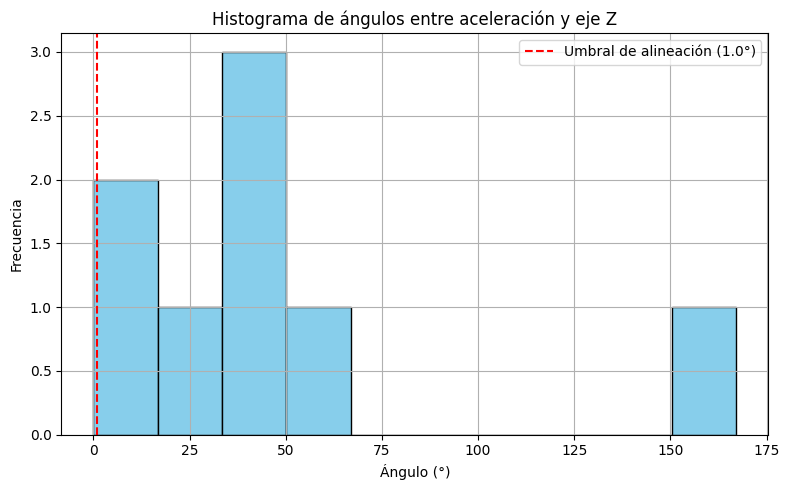

In [ ]:
import cmsisdsp as dsp
import numpy as np
import matplotlib.pyplot as plt

# Muestras de ejemplo de vectores de aceleración
accel_vectors = [
  [0.0, 0.6, 0.8],
  [0.0, 0.8, 0.6],
  [0.3, -0.4, 0.866],
  [0.0, 0.0, 1.0],
  [0.5, 0.5, 0.707],
  [0.1, 0.1, 0.99],
  [-0.7, 0.0, 0.7],
  [0.1, 0.2, -0.975]
]

# Vector unitario de aceleración de la gravedad
gravity_vector = [0.0, 0.0, 1.0]

# Ángulos
angles_deg = []

# Evalúo cada muestra
for accel_vector in accel_vectors:
  # Hago el producto escalar
  dot = dsp.arm_dot_prod_f32(accel_vector, gravity_vector)

  # Calculo las normas
  norm_accel = dsp.arm_dot_prod_f32(accel_vector, accel_vector)
  status, norm_accel = dsp.arm_sqrt_f32(norm_accel)
  if status:
    print("No se pudo computar la norma del vector de aceleración")
    exit()
  
  norm_gravity = dsp.arm_dot_prod_f32(gravity_vector, gravity_vector)
  status, norm_gravity = dsp.arm_sqrt_f32(norm_gravity)
  if status:
    print("No se pudo computar la norma del vector de gravedad")
    exit()

  # Calculo el ángulo
  cos_theta = dot / (norm_accel * norm_gravity)
  theta = np.degrees(np.acos(cos_theta))
  if 0.0 <= theta and theta <= 1.0:
    print(f"El vector {accel_vector} está alineado con la aceleración de la gravedad")
  else:
    print("Vector no alineado")

  # Agrego a la lista de ángulos para analizar luego
  angles_deg.append(theta)

plt.figure(figsize=(8, 5))
plt.hist(angles_deg, color='skyblue', edgecolor='black')
plt.axvline(1.0, color='red', linestyle='--', label='Umbral de alineación (1.0°)')
plt.title("Histograma de ángulos entre aceleración y eje Z")
plt.xlabel("Ángulo (°)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Monitoreo de temperatura

Se quiere monitorear la temperatura de una fuente de alimentación industrial. El sistema toma muestras cada segundo y se quiere detectar cualquier fluctuación anómala que puedan ser causadas por problemas de regulación térmica.

Se tomaron 30 muestras y se desea obtener la temperatura media ($\mu$) a la que trabaja la fuente de alimentación y la desviación estándar (s), entendiendo que una desviación $s > 1.0$ indicaría una inestabilidad térmica.

Las muestras que se obtuvieron cada $1 s$ son las siguientes:

```python
temperature_data = [
    35.1, 35.0, 34.9, 35.2, 35.1, 35.0, 35.1, 35.2, 35.0, 34.9,
    35.0, 35.1, 35.0, 35.2, 34.8, 35.3, 35.0, 35.1, 34.9, 35.0,
    35.1, 35.0, 35.2, 34.9, 35.0, 35.1, 35.0, 35.1, 35.0, 34.9
]
```

```python
temperature_data = [
    35.0, 37.5, 33.0, 36.1, 34.2, 35.8, 32.5, 37.0, 36.5, 33.6,
    38.2, 31.9, 36.0, 32.8, 37.4, 33.1, 35.0, 34.9, 36.8, 31.5,
    38.0, 33.2, 36.9, 34.0, 32.6, 37.1, 35.4, 32.3, 36.2, 33.5
]
```

1. Calcular la temperatura media a la que trabaja la fuente de alimentación usando la media aritmética:

$$
\mu = \frac{1}{N} \sum_{i=0}^{N-1} x_i
$$

2. Calcular la desviación estándar de temperatura y determinar si hay alguna inestabilidad térmica en la fuente de alimentación usando la desviación media muestral:

$$
s = \sqrt{\frac{1}{N-1} \sum_{i=0}^{N-1}(x_i - \overline{x})^2}
$$

3. Graficar en un boxplot ambos sets de temperaturas para poder ver la desviación. 

4. Migrar el algoritmo a la Raspberry Pi Pico 2 en un proyecto dentro de este directorio llamado [02_temperature_monitor](./02_temperature_monitor/).

### Referencias

* [Media aritmética](https://arm-software.github.io/CMSIS-DSP/latest/group__mean.html)
* [Desviación estándar](https://arm-software.github.io/CMSIS-DSP/latest/group__STD.html)
* [Matplotlib Boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

In [ ]:
import cmsisdsp as dsp
import matplotlib.pyplot as plt

# TODO

El valor medio de temperatura es de 34.93C
El sistema tiene una anomalía térmica. Su desviación estándar es de 2.00 °C
Revisar fuente de alimentación!


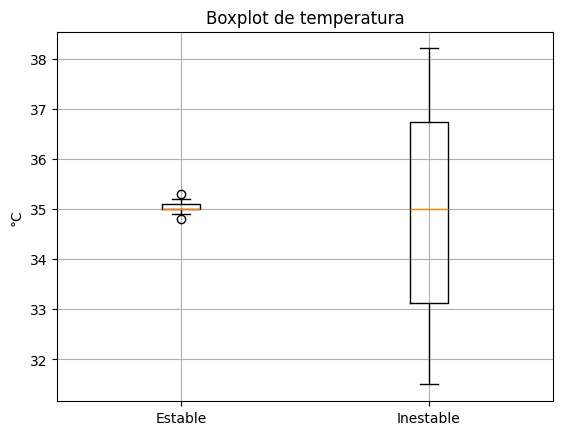

In [9]:
import cmsisdsp as dsp
import matplotlib.pyplot as plt

temperature_stable = [
    35.1, 35.0, 34.9, 35.2, 35.1, 35.0, 35.1, 35.2, 35.0, 34.9,
    35.0, 35.1, 35.0, 35.2, 34.8, 35.3, 35.0, 35.1, 34.9, 35.0,
    35.1, 35.0, 35.2, 34.9, 35.0, 35.1, 35.0, 35.1, 35.0, 34.9
]

temperature_unstable = [
    35.0, 37.5, 33.0, 36.1, 34.2, 35.8, 32.5, 37.0, 36.5, 33.6,
    38.2, 31.9, 36.0, 32.8, 37.4, 33.1, 35.0, 34.9, 36.8, 31.5,
    38.0, 33.2, 36.9, 34.0, 32.6, 37.1, 35.4, 32.3, 36.2, 33.5
]

# Calculo la media aritmética
mean = dsp.arm_mean_f32(temperature_unstable)
print(f"El valor medio de temperatura es de {mean:.2f}C")
# Calculo la desviación estándar
std_dev = dsp.arm_std_f32(temperature_unstable)

if std_dev < 1.0:
  print(f"El sistema está estable, tiene una desviación estándar de {std_dev:.2f} °C")
else:
  print(f"El sistema tiene una anomalía térmica. Su desviación estándar es de {std_dev:.2f} °C")
  print("Revisar fuente de alimentación!")


plt.boxplot([temperature_stable, temperature_unstable], tick_labels=['Estable', 'Inestable'])
plt.title("Boxplot de temperatura")
plt.ylabel("°C")
plt.grid(True)
plt.show()

## Estimación de autonomía de batería

Se quiere estimar la autonomía en minutos de una batería de $5 V$ $500 mAh$ a partir de las mediciones de tensión y corriente que se hicieron segundo a segundo. 

Usar los siguientes sets de muestras que fueron tomadas cada $1 s$:

```python
voltage = [
  5.0, 5.1, 5.0, 5.0, 5.1,
  5.0, 5.1, 5.0, 5.0, 5.1,
  5.0, 5.0, 5.1, 5.0, 5.0,
  5.0, 5.0, 5.1, 5.0, 5.0
]
```

```python
current = [
  0.20, 0.18, 0.21, 0.19, 0.20,
  0.22, 0.19, 0.21, 0.20, 0.18,
  0.02, 0.01, 0.03, 0.02, 0.01,
  0.01, 0.02, 0.01, 0.02, 0.01
]
```

1. Calcular la potencia instantánea en cada momento.
2. Calcular la energía total entregada hasta el momento (en Wh).
3. Estimar la autonomía de la batería en minutos como:

$$
t_{aut} = \frac{E_{batt} - E_{cons}}{\overline{P}}
$$

4. Hacer un gráfico de energía entregada acumulada.

5. Migrar el algoritmo a la Raspberry Pi Pico 2 en un proyecto dentro de este directorio llamado [03_battery_autonomy](./03_battery_autonomy/).

### Referencias

* [Multiplicación de vectores](https://arm-software.github.io/CMSIS-DSP/latest/group__BasicMult.html).
* [Acumulación de valores](https://arm-software.github.io/CMSIS-DSP/latest/group__Accumulation.html#ga5ef6f38d405cb2e809696ef3a166f39b).
* [Numpy suma acumulativa](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy-cumsum).

In [ ]:
import cmsisdsp as dsp
import matplotlib.pyplot as plt
import numpy

# TODO

Se vienen entregando 0.002994166480170356 Wh de los 2.5 Wh de la batería
A un ritmo de 0.5389499664306641 W, quedan 277.99 minutos de autonomía


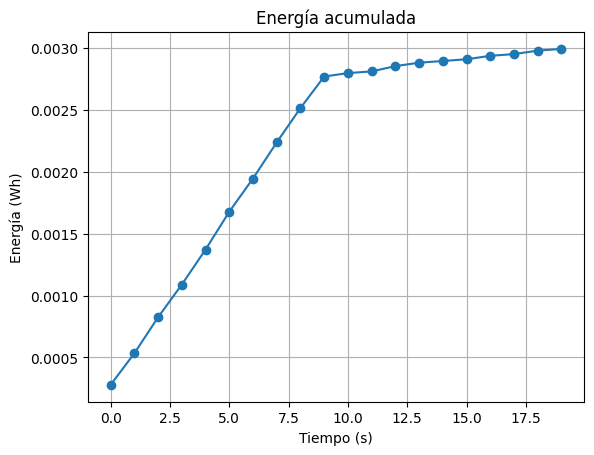

In [16]:
import cmsisdsp as dsp
import matplotlib.pyplot as plt
import numpy

# Mediciones de voltaje cada 1s
voltage = [
  5.0, 5.1, 5.0, 5.0, 5.1,
  5.0, 5.1, 5.0, 5.0, 5.1,
  5.0, 5.0, 5.1, 5.0, 5.0,
  5.0, 5.0, 5.1, 5.0, 5.0
]

# Mediciones de corriente cada 1s
current = [
  0.20, 0.18, 0.21, 0.19, 0.20,
  0.22, 0.19, 0.21, 0.20, 0.18,
  0.02, 0.01, 0.03, 0.02, 0.01,
  0.01, 0.02, 0.01, 0.02, 0.01
]

# Capacidad de batería en Wh
batt_capacity = 5 * 0.5

# Calculo la potencia instantántea
power = dsp.arm_mult_f32(voltage, current)

# Energía total consumida
energy_consumed = dsp.arm_accumulate_f32(power) / 3600

# Estimo la autonomía en minutos
power_mean = dsp.arm_mean_f32(power)
autonomy = 60 * (batt_capacity - energy_consumed) / power_mean

print(f"Se vienen entregando {energy_consumed} Wh de los {batt_capacity} Wh de la batería")
print(f"A un ritmo de {power_mean} W, quedan {autonomy:.2f} minutos de autonomía")

# Energía acumulada
accu_power = np.cumsum(power) / 3600

plt.plot(accu_power, marker='o')
plt.title("Energía acumulada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía (Wh)")
plt.grid()
plt.show()